Import der notwendigen Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Datensatz einlesen

In [2]:
df = pd.read_csv('digital_marketing_campaign_dataset.csv')

print(df)

      CustomerID  Age  Gender  Income CampaignChannel   CampaignType  \
0           8000   56  Female  136912    Social Media      Awareness   
1           8001   69    Male   41760           Email      Retention   
2           8002   46  Female   88456             PPC      Awareness   
3           8003   32  Female   44085             PPC     Conversion   
4           8004   60  Female   83964             PPC     Conversion   
...          ...  ...     ...     ...             ...            ...   
7995       15995   21    Male   24849           Email      Awareness   
7996       15996   43  Female   44718             SEO      Retention   
7997       15997   28  Female  125471        Referral  Consideration   
7998       15998   19  Female  107862             PPC  Consideration   
7999       15999   31  Female   93002           Email      Awareness   

          AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0     6497.870068          0.043919        0.088031              

Rundung der 'ConversionRate' auf vier Nachkommastellen genau

In [3]:
df['ConversionRate'] = df['ConversionRate'].round(4)
print(df['ConversionRate'])

0       0.0880
1       0.1827
2       0.0764
3       0.0880
4       0.1099
         ...  
7995    0.1168
7996    0.1901
7997    0.1338
7998    0.1384
7999    0.0572
Name: ConversionRate, Length: 8000, dtype: float64


Ausgabe der ersten fünf Zeilen des Datensatzes

In [4]:
print("Datenvorschau:")
print(df.head())

Datenvorschau:
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919          0.0880              0       2.399017    7.396803   
1          0.155725          0.1827             42       2.917138    5.352549   
2          0.277490          0.0764              2       8.223619   13.794901   
3          0.137611          0.0880             47       4.540939   14.688363   
4          0.252851          0.1099              0       2.046847   13.993370   

   SocialShares  

Grundlegende Informationen über den Datensatz

In [5]:
print("Grundlegende Informationen:")
print(df.info())

Grundlegende Informationen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPu

Überblick über den Datensatz

In [6]:
overview = {
    'shape': df.shape,
    'columns': df.columns.tolist(),
    'dtypes': df.dtypes.to_dict(),
    'missing_values': df.isnull().sum().to_dict()
}

print("Überblick über den Datensatz:")
print(overview)

Überblick über den Datensatz:
{'shape': (8000, 20), 'columns': ['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'], 'dtypes': {'CustomerID': dtype('int64'), 'Age': dtype('int64'), 'Gender': dtype('O'), 'Income': dtype('int64'), 'CampaignChannel': dtype('O'), 'CampaignType': dtype('O'), 'AdSpend': dtype('float64'), 'ClickThroughRate': dtype('float64'), 'ConversionRate': dtype('float64'), 'WebsiteVisits': dtype('int64'), 'PagesPerVisit': dtype('float64'), 'TimeOnSite': dtype('float64'), 'SocialShares': dtype('int64'), 'EmailOpens': dtype('int64'), 'EmailClicks': dtype('int64'), 'PreviousPurchases': dtype('int64'), 'LoyaltyPoints': dtype('int64'), 'AdvertisingPlatform': dtype('O'), 'AdvertisingTool': dtype('O'), 'Conversion': dtype(

Statistische Zusammenfassung aller Spalten

In [7]:
description = df.describe(include='all')

print("Statistische Zusammenfassung aller Spalten:")
print(description)

Statistische Zusammenfassung aller Spalten:
         CustomerID          Age  Gender         Income CampaignChannel  \
count    8000.00000  8000.000000    8000    8000.000000            8000   
unique          NaN          NaN       2            NaN               5   
top             NaN          NaN  Female            NaN        Referral   
freq            NaN          NaN    4839            NaN            1719   
mean    11999.50000    43.625500     NaN   84664.196750             NaN   
std      2309.54541    14.902785     NaN   37580.387945             NaN   
min      8000.00000    18.000000     NaN   20014.000000             NaN   
25%      9999.75000    31.000000     NaN   51744.500000             NaN   
50%     11999.50000    43.000000     NaN   84926.500000             NaN   
75%     13999.25000    56.000000     NaN  116815.750000             NaN   
max     15999.00000    69.000000     NaN  149986.000000             NaN   

       CampaignType      AdSpend  ClickThroughRate  Con

Statistische Zusammenfassung der numerischen Spalten

In [8]:
print("Statistische Zusammenfassung der numerischen Spalten:")
print(df.describe())

Statistische Zusammenfassung der numerischen Spalten:
        CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std         

Überprüfen auf fehlende Werte

In [9]:
missing_values = df.isnull().sum()
print("Fehlende Werte:")
print(missing_values)

Fehlende Werte:
CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64


Prüfen auf doppelte Einträge

In [10]:
duplicate_records = df[df.duplicated()]

print(f"Anzahl der doppelten Einträge: {duplicate_records.shape[0]}")

print("Doppelte Einträge:")
print(duplicate_records)

Anzahl der doppelten Einträge: 0
Doppelte Einträge:
Empty DataFrame
Columns: [CustomerID, Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, AdvertisingPlatform, AdvertisingTool, Conversion]
Index: []


Gruppierte Ausgabe aller Spalten von 'df' 

In [11]:
for column in df.columns:
    grouped = df.groupby(column).size().reset_index(name='Count')
    print(f"Gruppierte Ausgabe für Spalte: {column}")
    print(grouped)
    print("\n")

Gruppierte Ausgabe für Spalte: CustomerID
      CustomerID  Count
0           8000      1
1           8001      1
2           8002      1
3           8003      1
4           8004      1
...          ...    ...
7995       15995      1
7996       15996      1
7997       15997      1
7998       15998      1
7999       15999      1

[8000 rows x 2 columns]


Gruppierte Ausgabe für Spalte: Age
    Age  Count
0    18    148
1    19    150
2    20    151
3    21    160
4    22    139
5    23    154
6    24    129
7    25    162
8    26    143
9    27    136
10   28    153
11   29    148
12   30    157
13   31    148
14   32    157
15   33    148
16   34    177
17   35    155
18   36    153
19   37    156
20   38    162
21   39    165
22   40    170
23   41    151
24   42    167
25   43    178
26   44    128
27   45    173
28   46    165
29   47    150
30   48    120
31   49    173
32   50    149
33   51    155
34   52    172
35   53    149
36   54    160
37   55    143
38   56    147
39   57 

Definieren von Altersgruppen

In [12]:
# Altersgruppen definieren
bins = [17, 24, 34, 44, 54, 64, 74]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']

# Neue Spalte 'GroupedAge' erstellen
df['GroupedAge'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

print(df[['Age', 'GroupedAge']])
print(df[['Age', 'GroupedAge']].info())

      Age GroupedAge
0      56      55-64
1      69      65-74
2      46      45-54
3      32      25-34
4      60      55-64
...   ...        ...
7995   21      18-24
7996   43      35-44
7997   28      25-34
7998   19      18-24
7999   31      25-34

[8000 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Age         8000 non-null   int64   
 1   GroupedAge  8000 non-null   category
dtypes: category(1), int64(1)
memory usage: 70.7 KB
None


Ausgabe des Grouped Dataframes

In [13]:
grouped_df = df[['GroupedAge', 'Gender', 'CampaignChannel', 'ConversionRate']]

print("Grouped DataFrame:")
print(grouped_df)

Grouped DataFrame:
     GroupedAge  Gender CampaignChannel  ConversionRate
0         55-64  Female    Social Media          0.0880
1         65-74    Male           Email          0.1827
2         45-54  Female             PPC          0.0764
3         25-34  Female             PPC          0.0880
4         55-64  Female             PPC          0.1099
...         ...     ...             ...             ...
7995      18-24    Male           Email          0.1168
7996      35-44  Female             SEO          0.1901
7997      25-34  Female        Referral          0.1338
7998      18-24  Female             PPC          0.1384
7999      25-34  Female           Email          0.0572

[8000 rows x 4 columns]


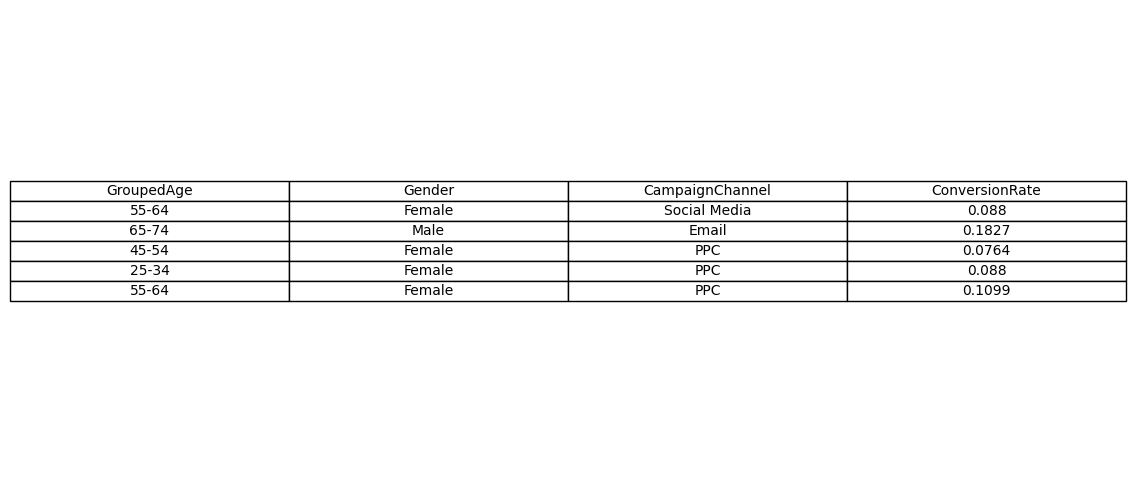

In [14]:
from matplotlib.backends.backend_pdf import PdfPages

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))  # Größe der Abbildung festlegen
ax.axis('tight')
ax.axis('off')

# Kopf des DataFrames in eine Tabelle konvertieren
table = ax.table(cellText=grouped_df.head().values, colLabels=grouped_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Bild anzeigen
plt.show()

# Tabelle als PDF speichern
with PdfPages('grouped_df2_table.pdf') as pdf:
    pdf.savefig(fig)


Grundlegende Informationen über 'grouped_df'

In [15]:
print("Grundlegende Informationen des Grouped Dataframes:")
print(grouped_df.info())

Grundlegende Informationen des Grouped Dataframes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GroupedAge       8000 non-null   category
 1   Gender           8000 non-null   object  
 2   CampaignChannel  8000 non-null   object  
 3   ConversionRate   8000 non-null   float64 
dtypes: category(1), float64(1), object(2)
memory usage: 195.7+ KB
None


Statistische Zusammenfassung aller Spalten von 'grouped_df'

In [16]:
description = grouped_df.describe(include='all')

print("Statistische Zusammenfassung aller Spalten von grouped_df:")
print(description)

Statistische Zusammenfassung aller Spalten von grouped_df:
       GroupedAge  Gender CampaignChannel  ConversionRate
count        8000    8000            8000     8000.000000
unique          6       2               5             NaN
top         35-44  Female        Referral             NaN
freq         1585    4839            1719             NaN
mean          NaN     NaN             NaN        0.104389
std           NaN     NaN             NaN        0.054878
min           NaN     NaN             NaN        0.010000
25%           NaN     NaN             NaN        0.056400
50%           NaN     NaN             NaN        0.104050
75%           NaN     NaN             NaN        0.152100
max           NaN     NaN             NaN        0.200000


Werteverteilung der Spalten 'GroupedAge', 'Gender' und 'CampaignChannel'

In [17]:
for column in ['GroupedAge', 'Gender', 'CampaignChannel']:
    print(f"Wertverteilung für Spalte: {column}")
    print(grouped_df[column].value_counts())
    print("\n")

Wertverteilung für Spalte: GroupedAge
GroupedAge
35-44    1585
45-54    1566
55-64    1535
25-34    1529
18-24    1031
65-74     754
Name: count, dtype: int64


Wertverteilung für Spalte: Gender
Gender
Female    4839
Male      3161
Name: count, dtype: int64


Wertverteilung für Spalte: CampaignChannel
CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64




Visualisierung der Werteverteilung

C:\Users\gabri\AppData\Local\Temp\ipykernel_29672\1391517686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=grouped_df, x=column, palette='Blues')


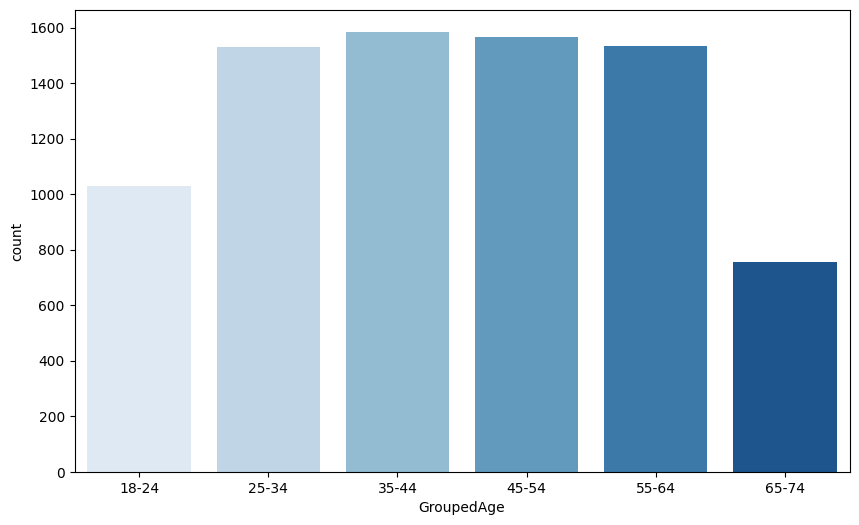

C:\Users\gabri\AppData\Local\Temp\ipykernel_29672\1391517686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=grouped_df, x=column, palette='Blues')


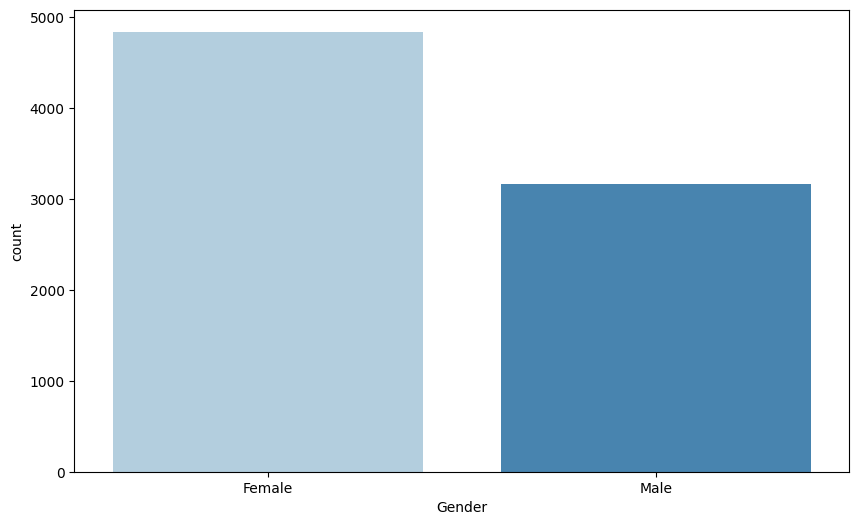

C:\Users\gabri\AppData\Local\Temp\ipykernel_29672\1391517686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=grouped_df, x=column, palette='Blues')


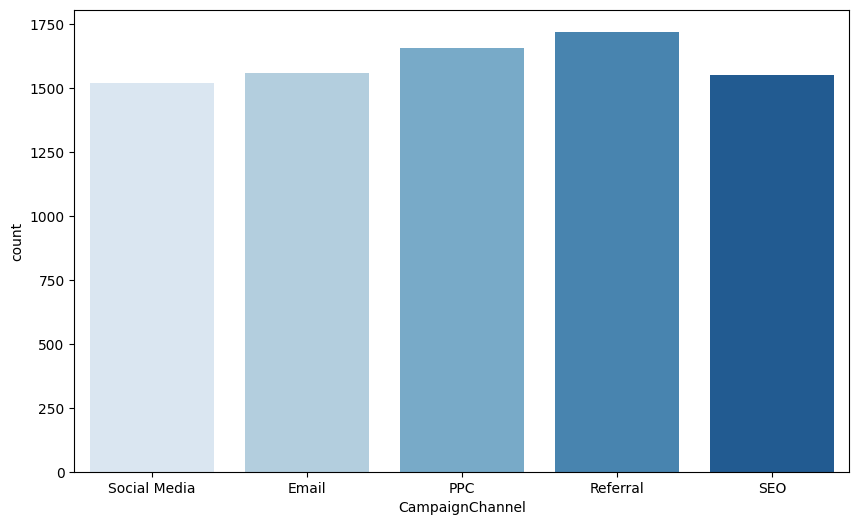

In [18]:
for column in ['GroupedAge', 'Gender', 'CampaignChannel']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=grouped_df, x=column, palette='Blues')
    #plt.title(f'Werteverteilung für Spalte: {column}')
    plt.xticks(ha='center')
    plt.show()

Werteverteilung der Spalten 'GroupedAge', 'Gender' und 'CampaignChannel' in Prozent

In [19]:
for column in ['GroupedAge', 'Gender', 'CampaignChannel']:
    print(f"Wertverteilung in Prozent für Spalte: {column}")
    print(grouped_df[column].value_counts(normalize=True) * 100)
    print("\n")

Wertverteilung in Prozent für Spalte: GroupedAge
GroupedAge
35-44    19.8125
45-54    19.5750
55-64    19.1875
25-34    19.1125
18-24    12.8875
65-74     9.4250
Name: proportion, dtype: float64


Wertverteilung in Prozent für Spalte: Gender
Gender
Female    60.4875
Male      39.5125
Name: proportion, dtype: float64


Wertverteilung in Prozent für Spalte: CampaignChannel
CampaignChannel
Referral        21.4875
PPC             20.6875
Email           19.4625
SEO             19.3750
Social Media    18.9875
Name: proportion, dtype: float64




Visualisierung der Werteverteilung

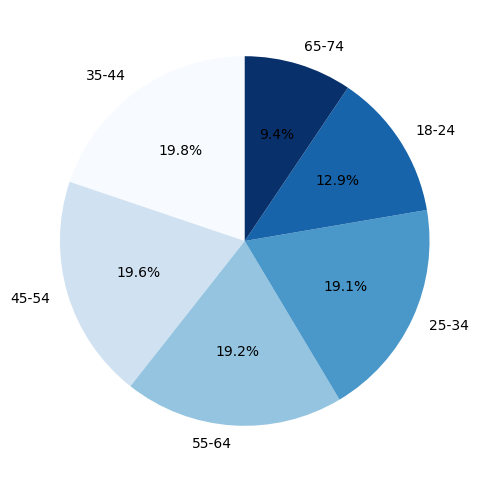

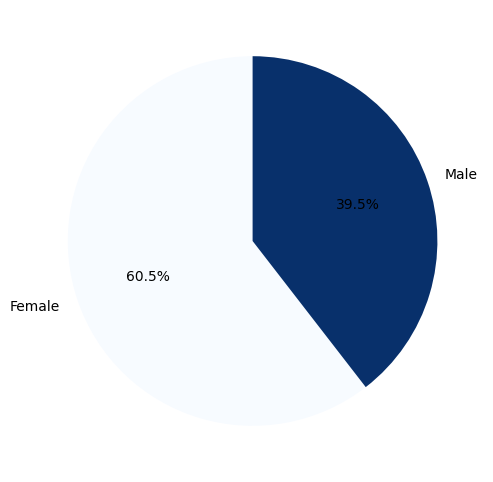

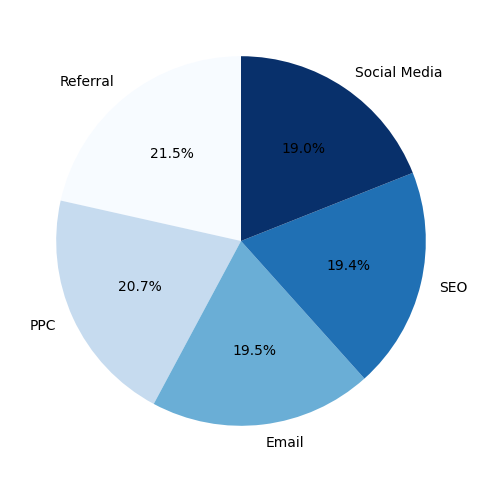

In [20]:
for column in ['GroupedAge', 'Gender', 'CampaignChannel']:
    plt.figure(figsize=(10, 6))
    grouped_df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Blues')
    #plt.title(f'Werteverteilung für Spalte: {column}')
    plt.ylabel('')
    plt.show()

Kontingenztabellen für die Spalten 'Gender', 'GroupedAge' und 'CampaignChannel' von 'grouped_df' in Absoluten Werten

In [21]:
combinations = [
    ('Gender', 'GroupedAge'),
    ('Gender', 'CampaignChannel'),
    ('GroupedAge', 'CampaignChannel'),
    ('Gender', 'GroupedAge', 'CampaignChannel')
]

for combination in combinations:
    kontingenztabelle = pd.crosstab(index=[grouped_df[col] for col in combination[:-1]], columns=grouped_df[combination[-1]])
    print(f"Kontingenztabelle für {' und '.join(combination)}:")
    print(kontingenztabelle)
    print("\n")

Kontingenztabelle für Gender und GroupedAge:
GroupedAge  18-24  25-34  35-44  45-54  55-64  65-74
Gender                                              
Female        616    906    975    948    930    464
Male          415    623    610    618    605    290


Kontingenztabelle für Gender und CampaignChannel:
CampaignChannel  Email   PPC  Referral  SEO  Social Media
Gender                                                   
Female             956  1000      1052  944           887
Male               601   655       667  606           632


Kontingenztabelle für GroupedAge und CampaignChannel:
CampaignChannel  Email  PPC  Referral  SEO  Social Media
GroupedAge                                              
18-24              208  211       221  192           199
25-34              324  325       328  278           274
35-44              303  329       327  311           315
45-54              310  301       330  305           320
55-64              259  340       343  315           278
65-7

Visualisierung der Kontingenztabellen mit Balkendiagrammen 

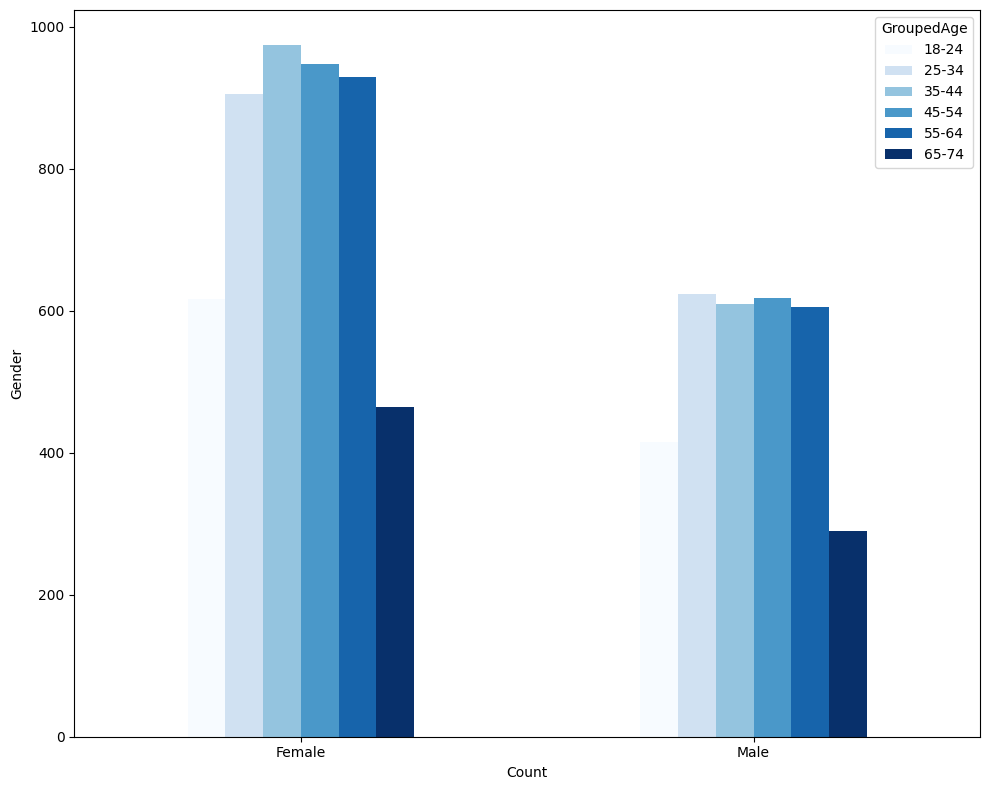

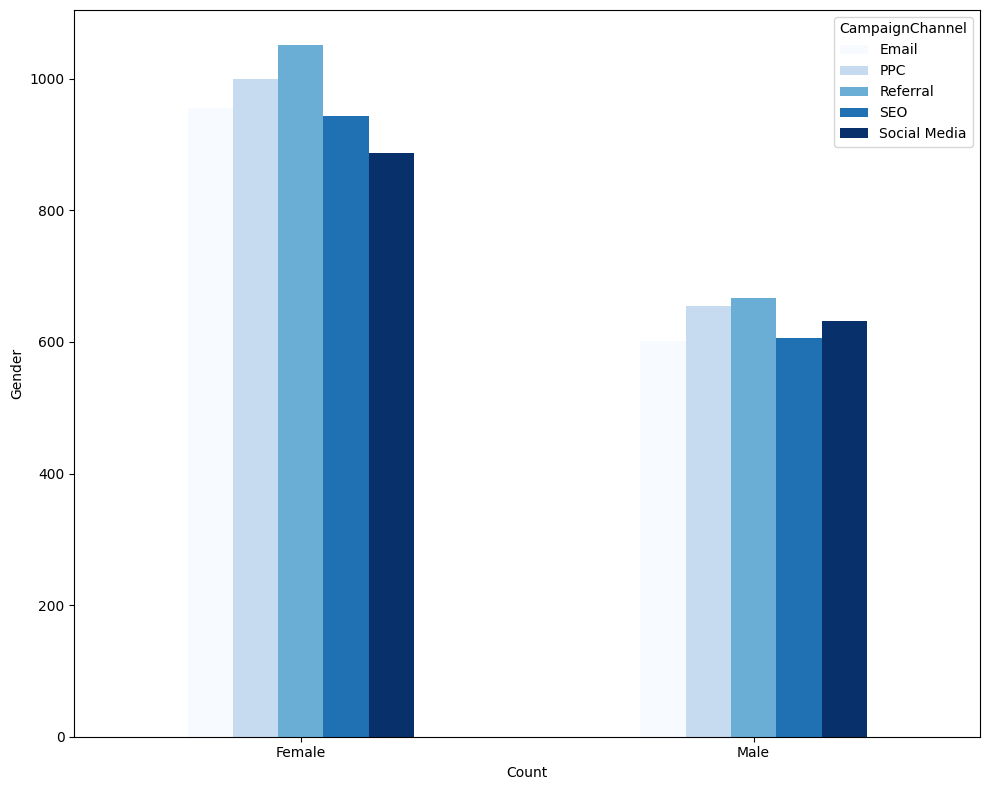

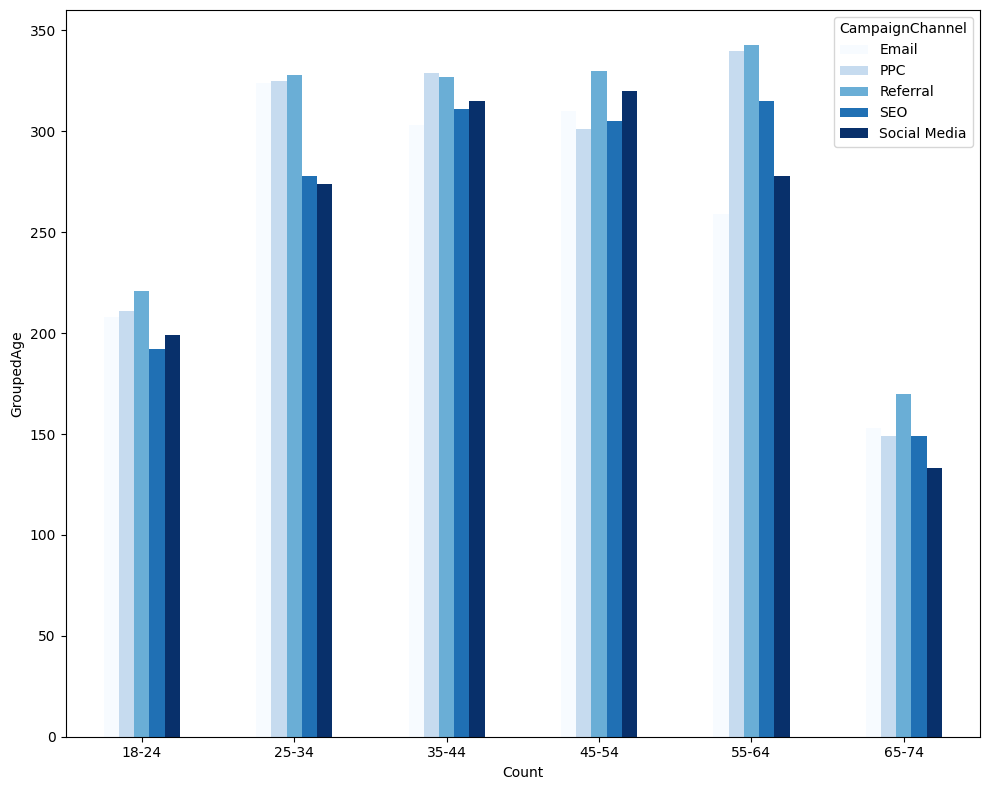

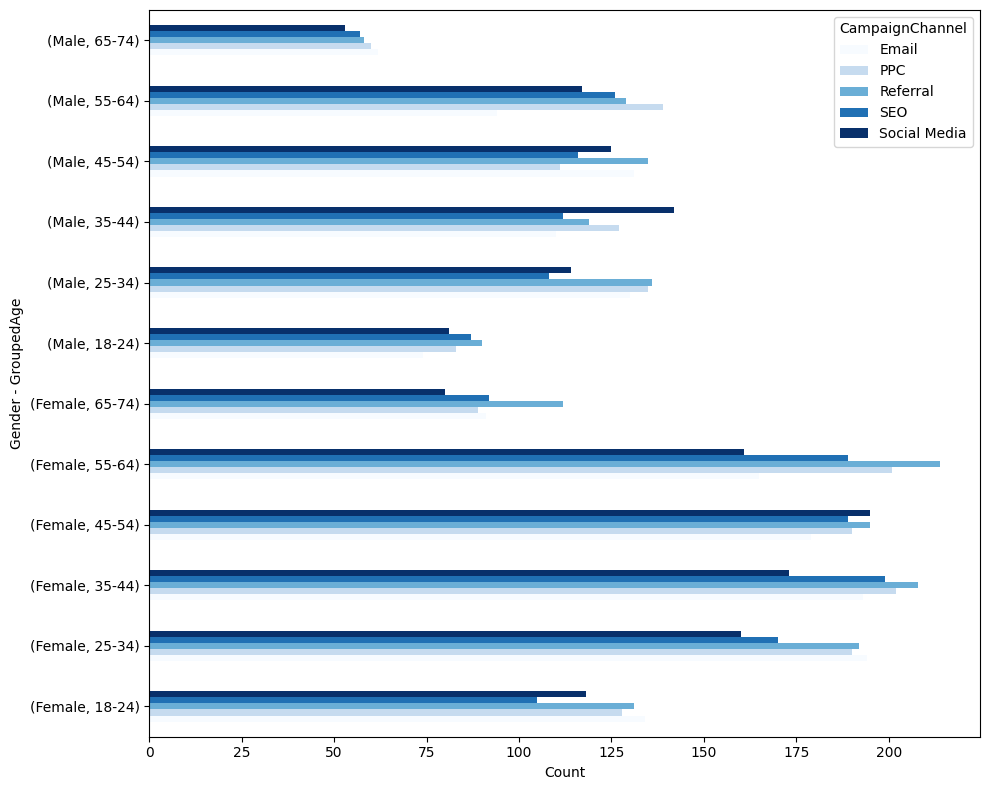

In [22]:
for combination in combinations:
    kontingenztabelle = pd.crosstab(index=[grouped_df[col] for col in combination[:-1]], columns=grouped_df[combination[-1]])
    if not kontingenztabelle.empty:
        if combination == combinations[-1]:
            ax = kontingenztabelle.plot(kind='barh', figsize=(10, 8), cmap='Blues')
            #plt.title(f'Kontingenztabelle für {" und ".join(combination)}')
            plt.xlabel('Count')
            plt.ylabel(' - '.join(combination[:-1]))
            plt.xticks(rotation=0, ha='center')
            plt.tight_layout()
            plt.show()
        else:
            ax = kontingenztabelle.plot(kind='bar', figsize=(10, 8), cmap='Blues')
            #plt.title(f'Kontingenztabelle für {" und ".join(combination)}')
            plt.xlabel('Count')
            plt.ylabel(' - '.join(combination[:-1]))
            plt.xticks(rotation=0, ha='center')
            plt.tight_layout()
            plt.show()

Kontingenztabellen für alle Spalten von 'grouped_df' in Prozent

In [23]:
for i, col1 in enumerate(grouped_df.columns):
    for col2 in grouped_df.columns[i+1:]:
        kontingenztabelle = pd.crosstab(grouped_df[col1], grouped_df[col2], normalize='index') * 100
        print(f"Kontingenztabelle für {col1} und {col2} (relative Häufigkeiten in Prozent):")
        print(kontingenztabelle)
        print("\n")

Kontingenztabelle für GroupedAge und Gender (relative Häufigkeiten in Prozent):
Gender         Female       Male
GroupedAge                      
18-24       59.747818  40.252182
25-34       59.254415  40.745585
35-44       61.514196  38.485804
45-54       60.536398  39.463602
55-64       60.586319  39.413681
65-74       61.538462  38.461538


Kontingenztabelle für GroupedAge und CampaignChannel (relative Häufigkeiten in Prozent):
CampaignChannel      Email        PPC   Referral        SEO  Social Media
GroupedAge                                                               
18-24            20.174588  20.465567  21.435500  18.622696     19.301649
25-34            21.190320  21.255723  21.451929  18.181818     17.920209
35-44            19.116719  20.757098  20.630915  19.621451     19.873817
45-54            19.795658  19.220945  21.072797  19.476373     20.434227
55-64            16.872964  22.149837  22.345277  20.521173     18.110749
65-74            20.291777  19.761273  22.54641

Visualisierung der Kontingenztabellen mit Kreisdiagrammen 

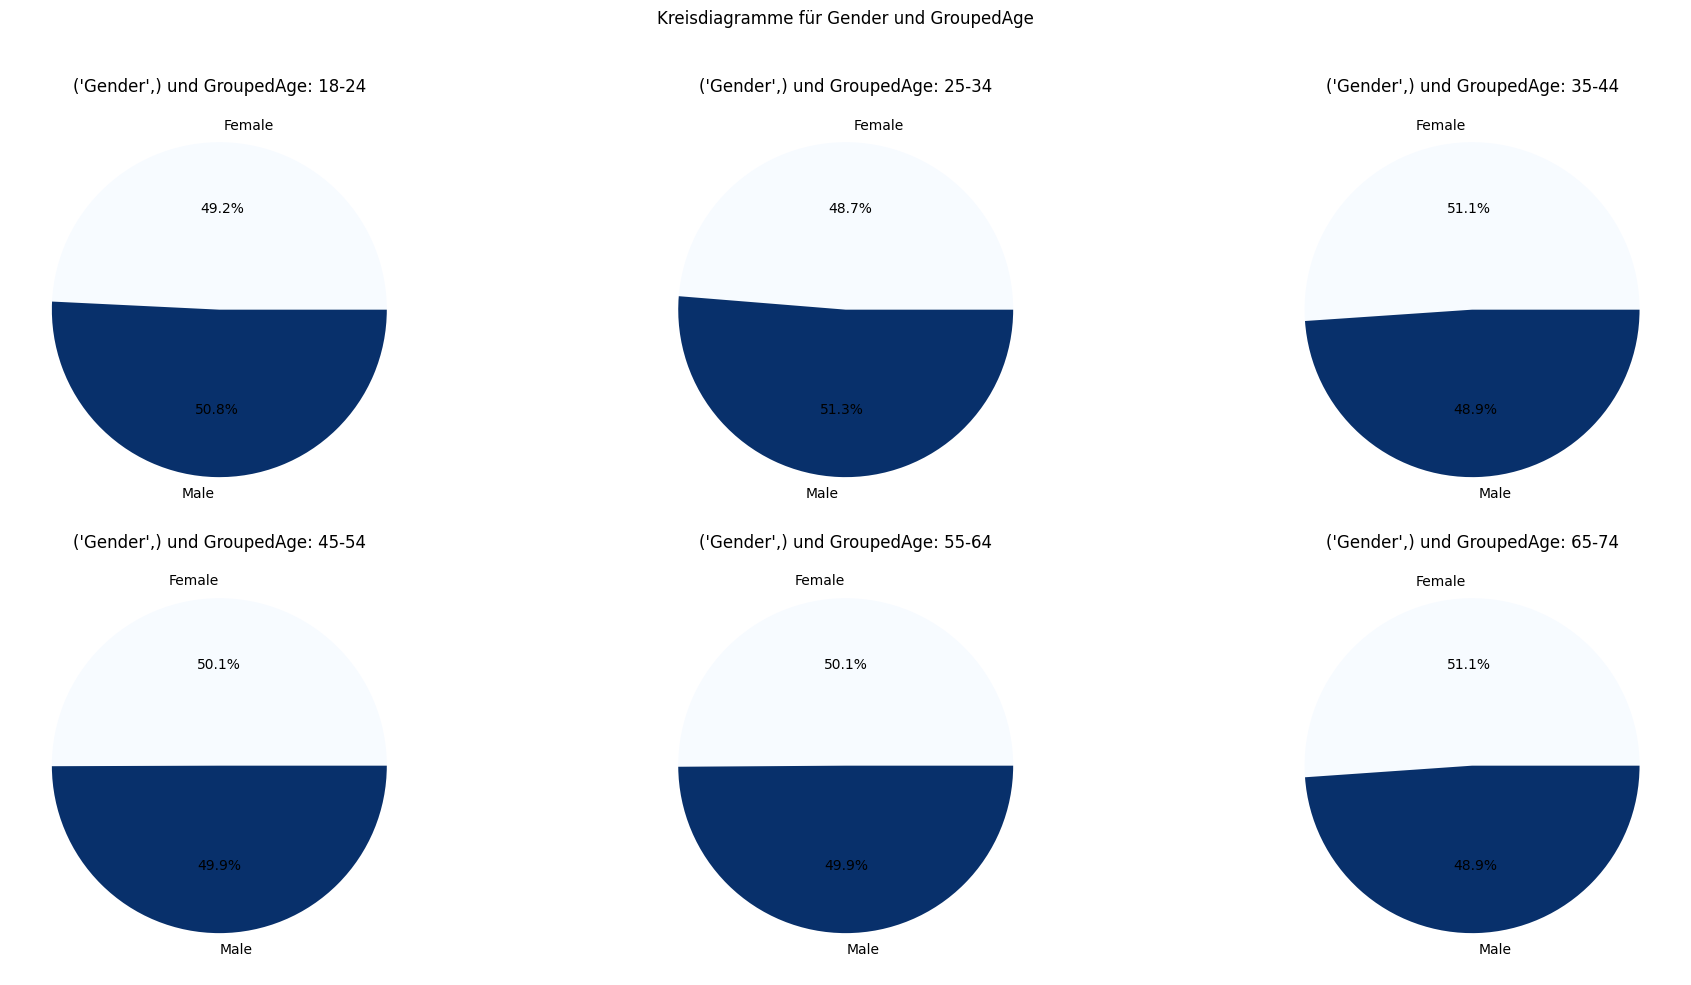

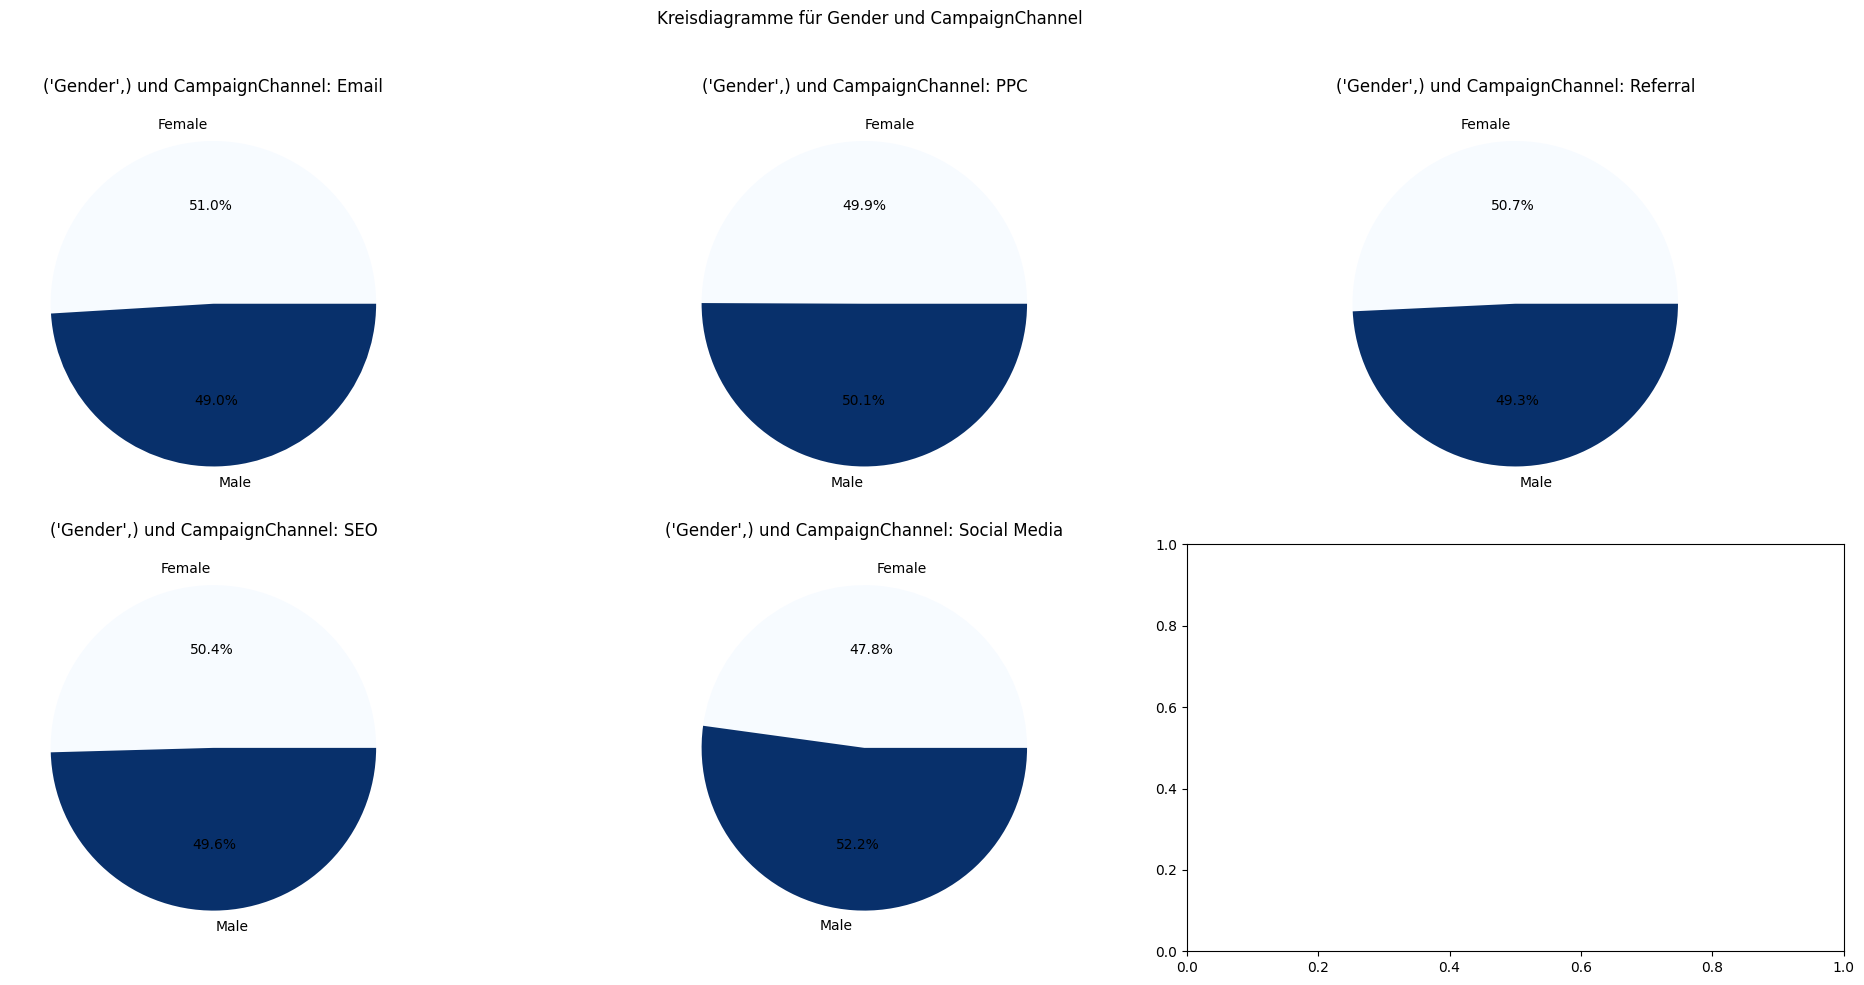

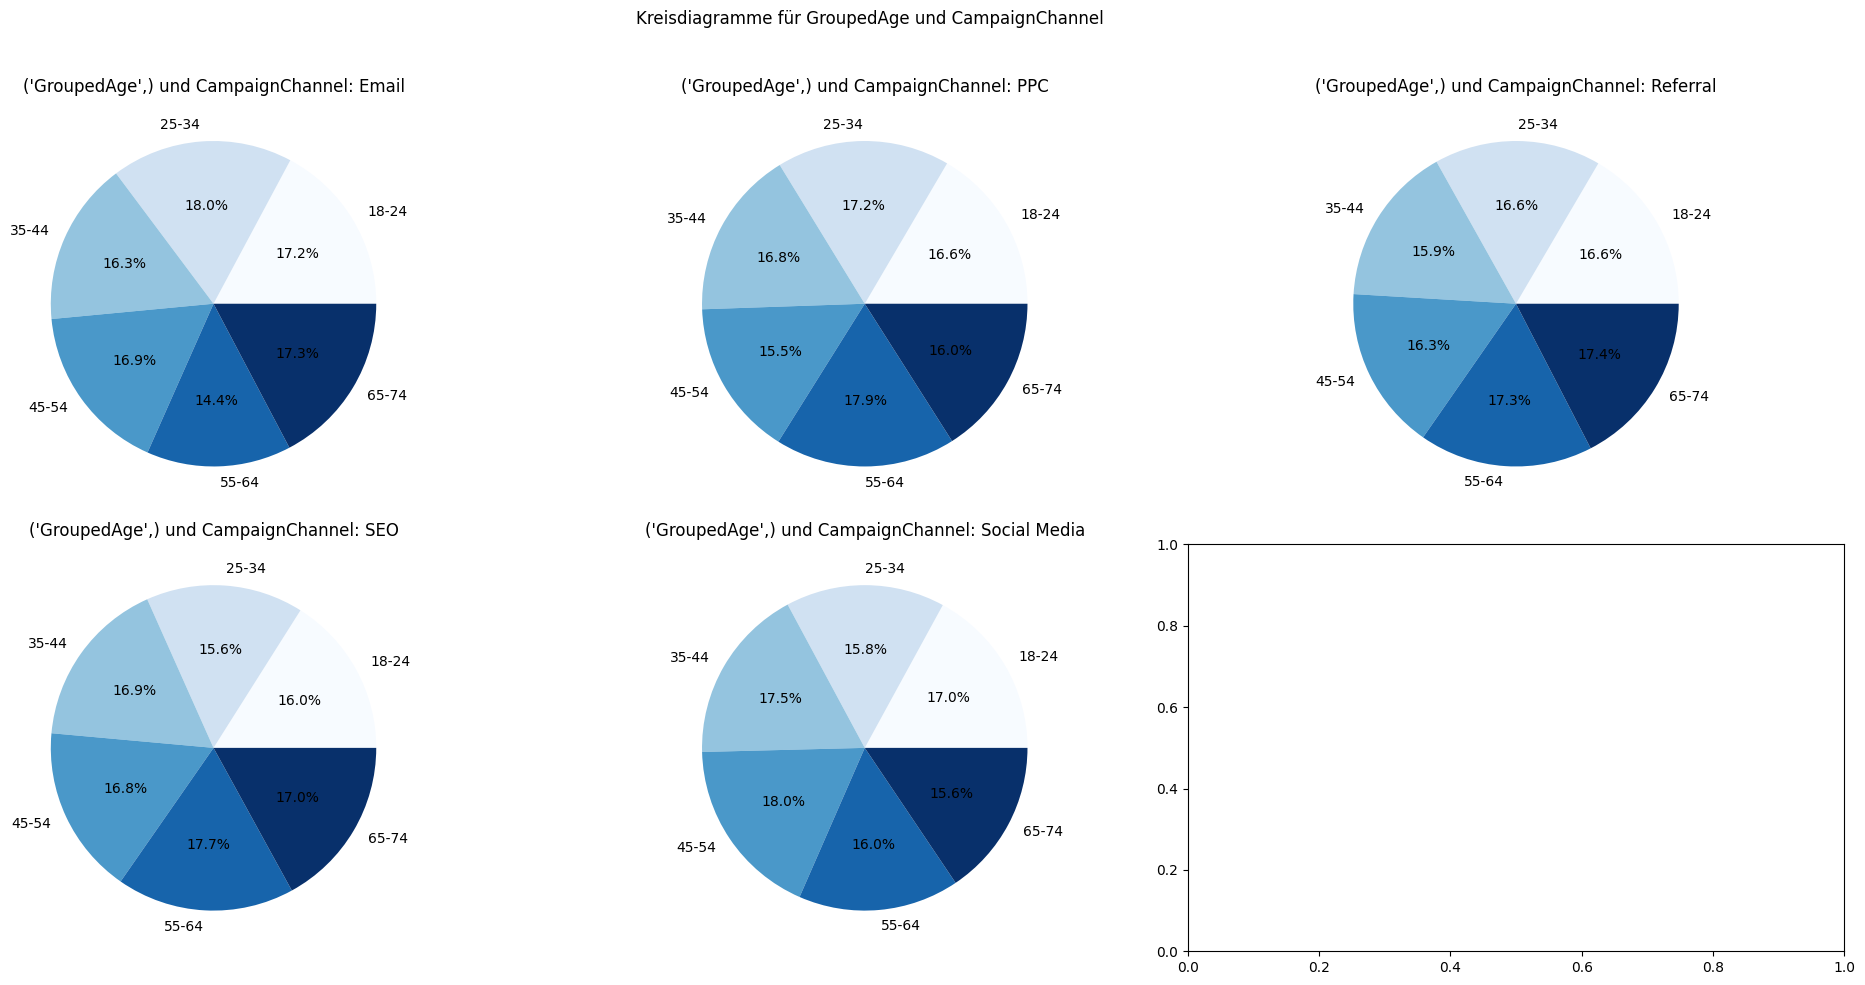

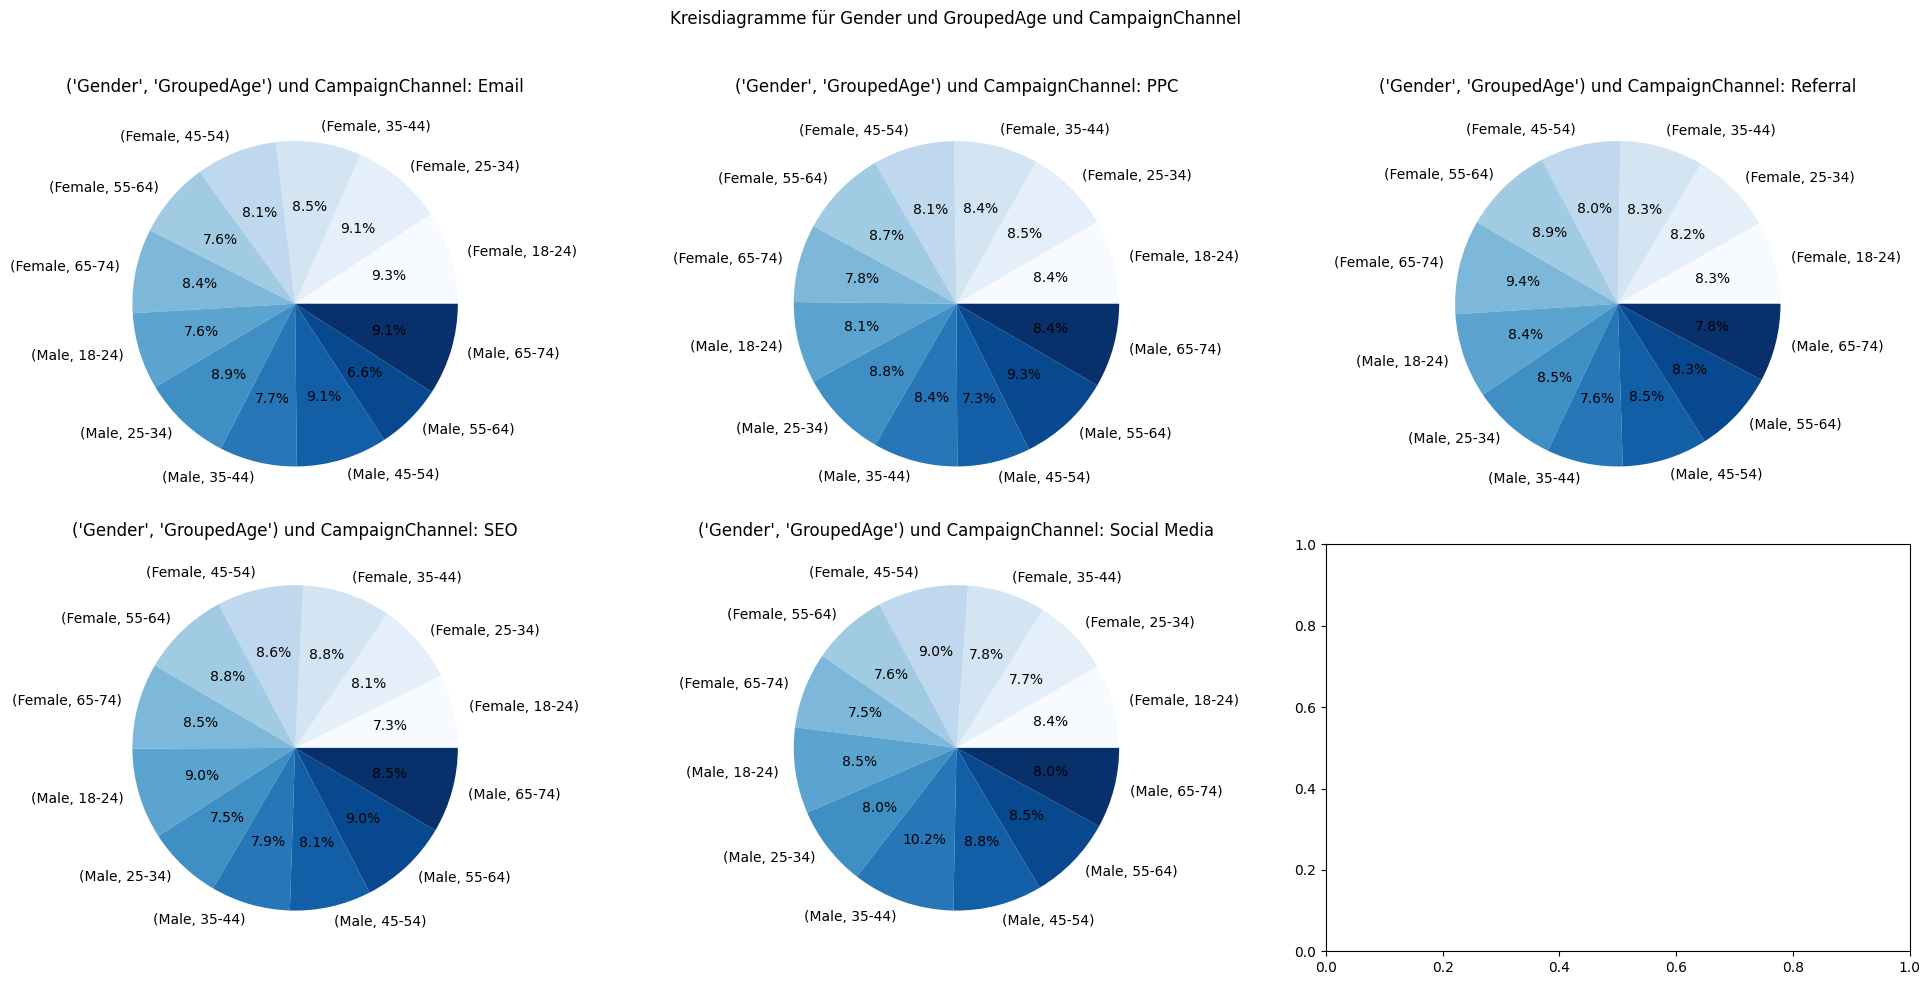

In [24]:
num_plots_per_row = 3

for combination in combinations:
    kontingenztabelle = pd.crosstab(index=[grouped_df[col] for col in combination[:-1]], columns=grouped_df[combination[-1]], normalize='index') * 100
    if not kontingenztabelle.empty:
        num_subplots = len(kontingenztabelle.columns)
        num_rows = (num_subplots // num_plots_per_row) + int(num_subplots % num_plots_per_row != 0)
        fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(20, 5 * num_rows))
        axes = axes.flatten()
        
        for j, (col, ax) in enumerate(zip(kontingenztabelle.columns, axes)):
            kontingenztabelle[col].plot(kind='pie', ax=ax, autopct='%1.1f%%', legend=False, cmap='Blues')
            ax.set_ylabel('')
            ax.set_title(f'{combination[:-1]} und {combination[-1]}: {col}')
        
        plt.suptitle(f'Kreisdiagramme für {" und ".join(combination)}')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

Mittelwert und Median von 'ConversionRate'

In [25]:
mean_conversion_rate = df['ConversionRate'].mean()
median_conversion_rate = df['ConversionRate'].median()

print(f'Mean Conversion Rate: {mean_conversion_rate}')
print(f'Median Conversion Rate: {median_conversion_rate}')

Mean Conversion Rate: 0.10438850000000001
Median Conversion Rate: 0.10405


Boxplot der 'ConversionRate'

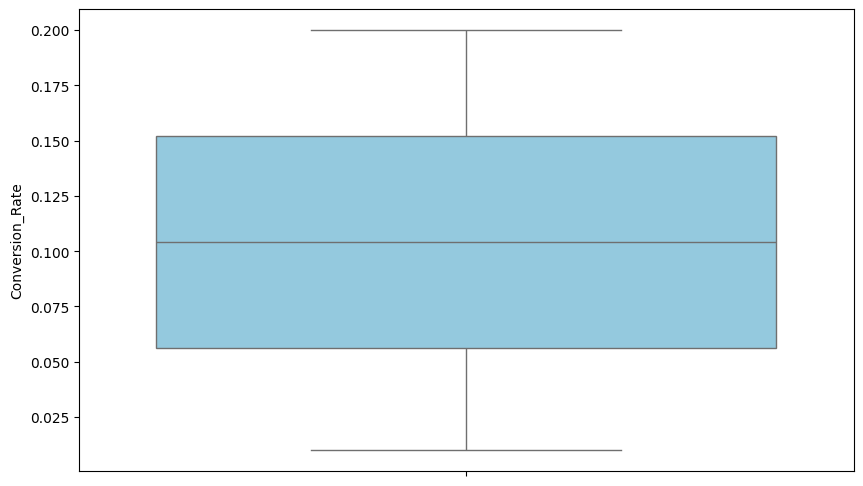

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['ConversionRate'], color='skyblue')

#plt.title('Boxplot der ConversionRate')
plt.ylabel('Conversion_Rate')
plt.show()

Boxplot der 'ConversionRate' mit Mittelwert

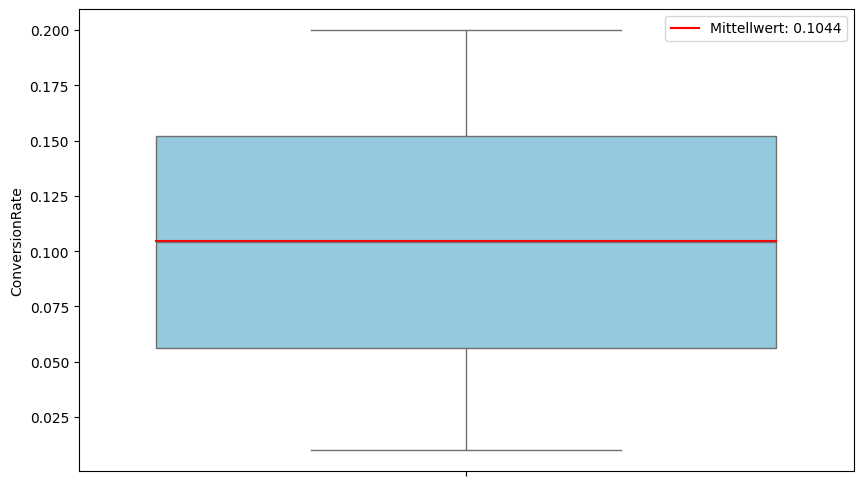

In [27]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['ConversionRate'], color='skyblue')

# Durchschnittslinie hinzufügen
mean_value = np.mean(df['ConversionRate'])
plt.axhline(mean_value, color='red', linestyle='-', xmin=0.1, xmax=0.9, label=f'Mittellwert: {mean_value:.4f}')

#plt.title('Boxplot der ConversionRate')
plt.ylabel('ConversionRate')
plt.legend()
plt.show()

Verteilung der 'ConversionRate'

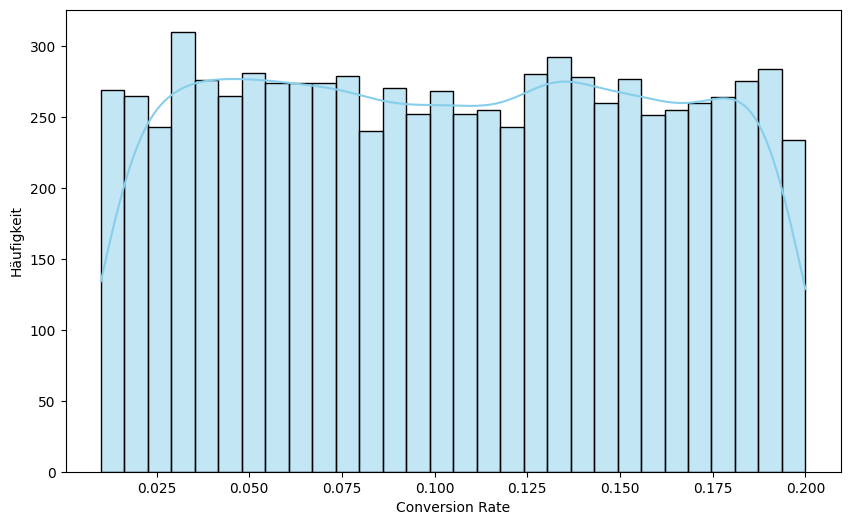

In [28]:
import seaborn as sns

def visualize_conversion_rate(grouped_df):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.histplot(df['ConversionRate'], bins=30, kde=True, color='skyblue')
    #plt.title('Verteilung der ConversionRate')
    plt.xlabel('Conversion Rate')
    plt.ylabel('Häufigkeit')
    plt.show()

# Aufruf der Funktion
visualize_conversion_rate(grouped_df)

Boxplot der 'ConversionRate' mit 'Gender', 'GroupedAge' und 'CampaignChannel'

C:\Users\gabri\AppData\Local\Temp\ipykernel_29672\3904071015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=grouped_df[col], y=grouped_df['ConversionRate'], palette='Blues')
C:\Users\gabri\AppData\Local\Temp\ipykernel_29672\3904071015.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = grouped_df.groupby(col)['ConversionRate'].mean().reset_index()


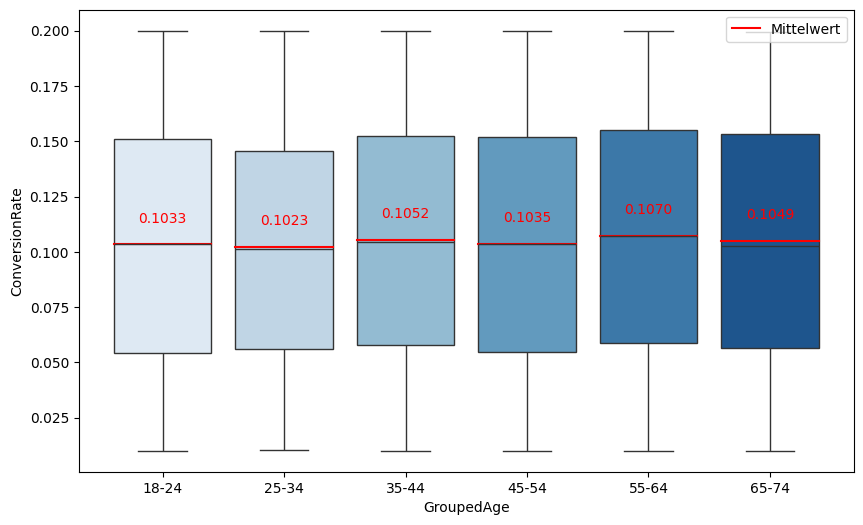

C:\Users\gabri\AppData\Local\Temp\ipykernel_29672\3904071015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=grouped_df[col], y=grouped_df['ConversionRate'], palette='Blues')


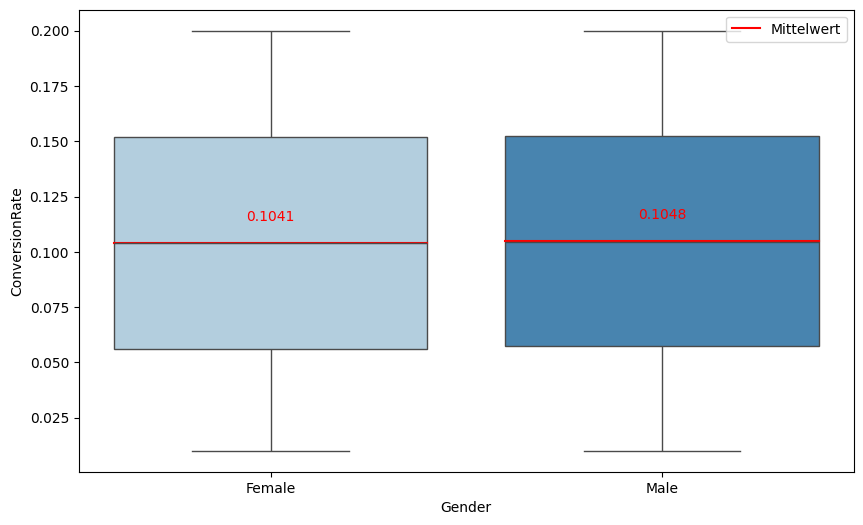

C:\Users\gabri\AppData\Local\Temp\ipykernel_29672\3904071015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=grouped_df[col], y=grouped_df['ConversionRate'], palette='Blues')


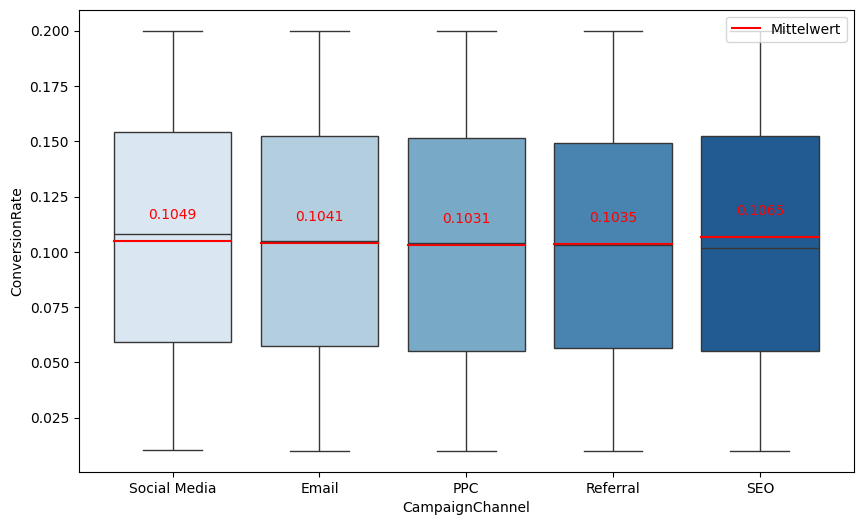

In [29]:
for col in grouped_df.columns:
    if col != 'ConversionRate':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=grouped_df[col], y=grouped_df['ConversionRate'], palette='Blues')
        
        # Mittelwert für jede Gruppe berechnen
        means = grouped_df.groupby(col)['ConversionRate'].mean().reset_index()
        
        # Mittelwertslinie hinzufügen
        for i, mean_value in means.iterrows():
            plt.plot([i - 0.4, i + 0.4], [mean_value['ConversionRate'], mean_value['ConversionRate']], 'r-', label='Mittelwert' if i == 0 else "")
            plt.text(i, mean_value['ConversionRate'] + 0.01, f'{mean_value["ConversionRate"]:.4f}', color='red', ha='center')
        
        #plt.title(f'Boxplot für {col} und ConversionRate')
        plt.xticks(ha='center')
        plt.legend(loc='upper right')
        plt.show()

Durchschnittliche Conversionrate nach CampaignChannel und Gender

C:\Users\gabri\AppData\Local\Temp\ipykernel_29672\2974585284.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_conversion_rates = df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].mean().reset_index()
C:\Users\gabri\AppData\Local\Temp\ipykernel_29672\2974585284.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_conversion_rates, x='CampaignChannel', y='ConversionRate', hue='Gender', ci=None, palette='Blues')


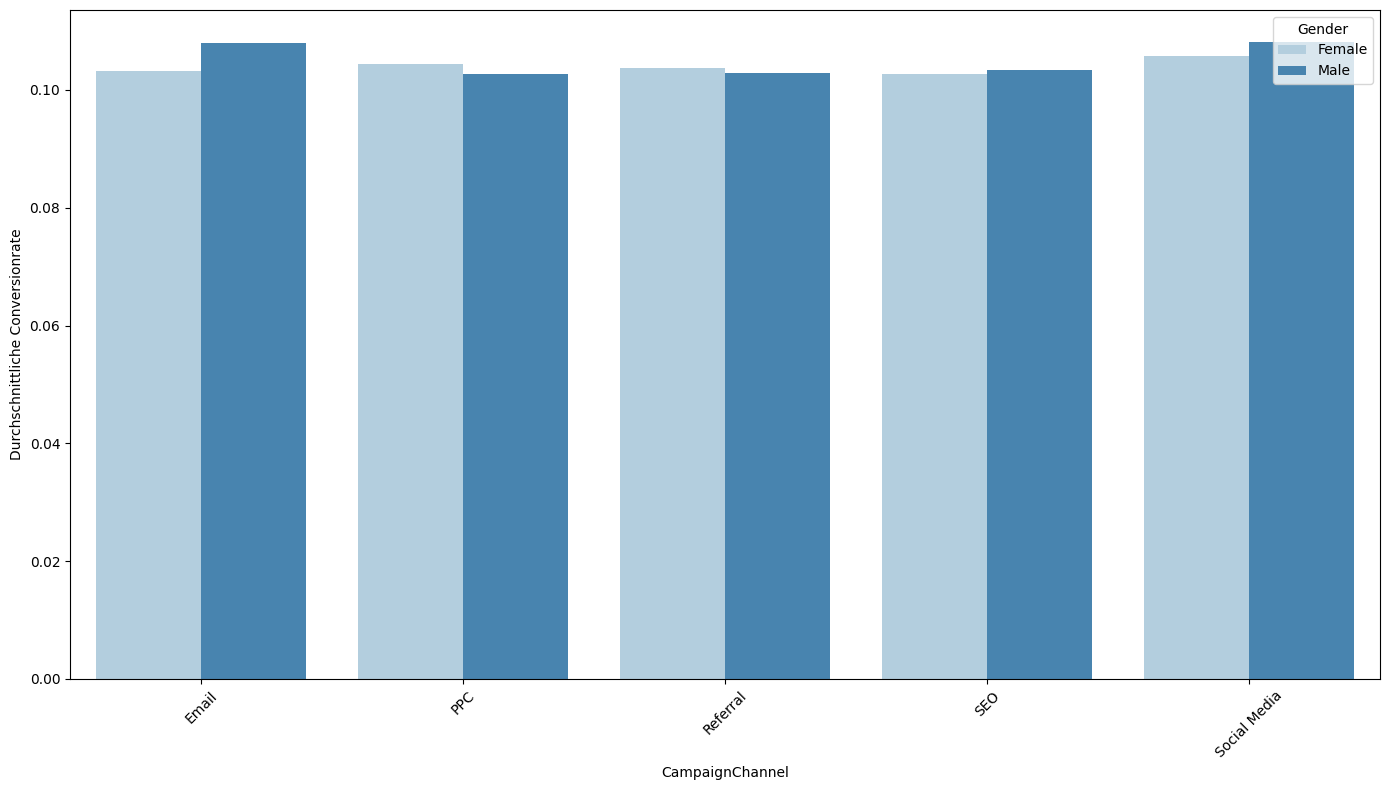

In [30]:
def visualize_conversion_rate(df):
    import matplotlib.pyplot as plt

    # Berechnung der durchschnittlichen Conversionrate für jede Kombination
    mean_conversion_rates = df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].mean().reset_index()

    # Visualisierung der Conversionrate
    plt.figure(figsize=(14, 8))
    sns.barplot(data=mean_conversion_rates, x='CampaignChannel', y='ConversionRate', hue='Gender', ci=None, palette='Blues')
    #plt.title('Durchschnittliche Conversionrate nach CampaignChannel und Gender')
    plt.xlabel('CampaignChannel')
    plt.ylabel('Durchschnittliche Conversionrate')
    plt.legend(title='Gender')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Aufruf der Funktion
visualize_conversion_rate(df)

Durchschnittliche Conversionrate für jede Mögliche Kombination von 'Gender', 'GroupedAge' und 'CampaignChannel'

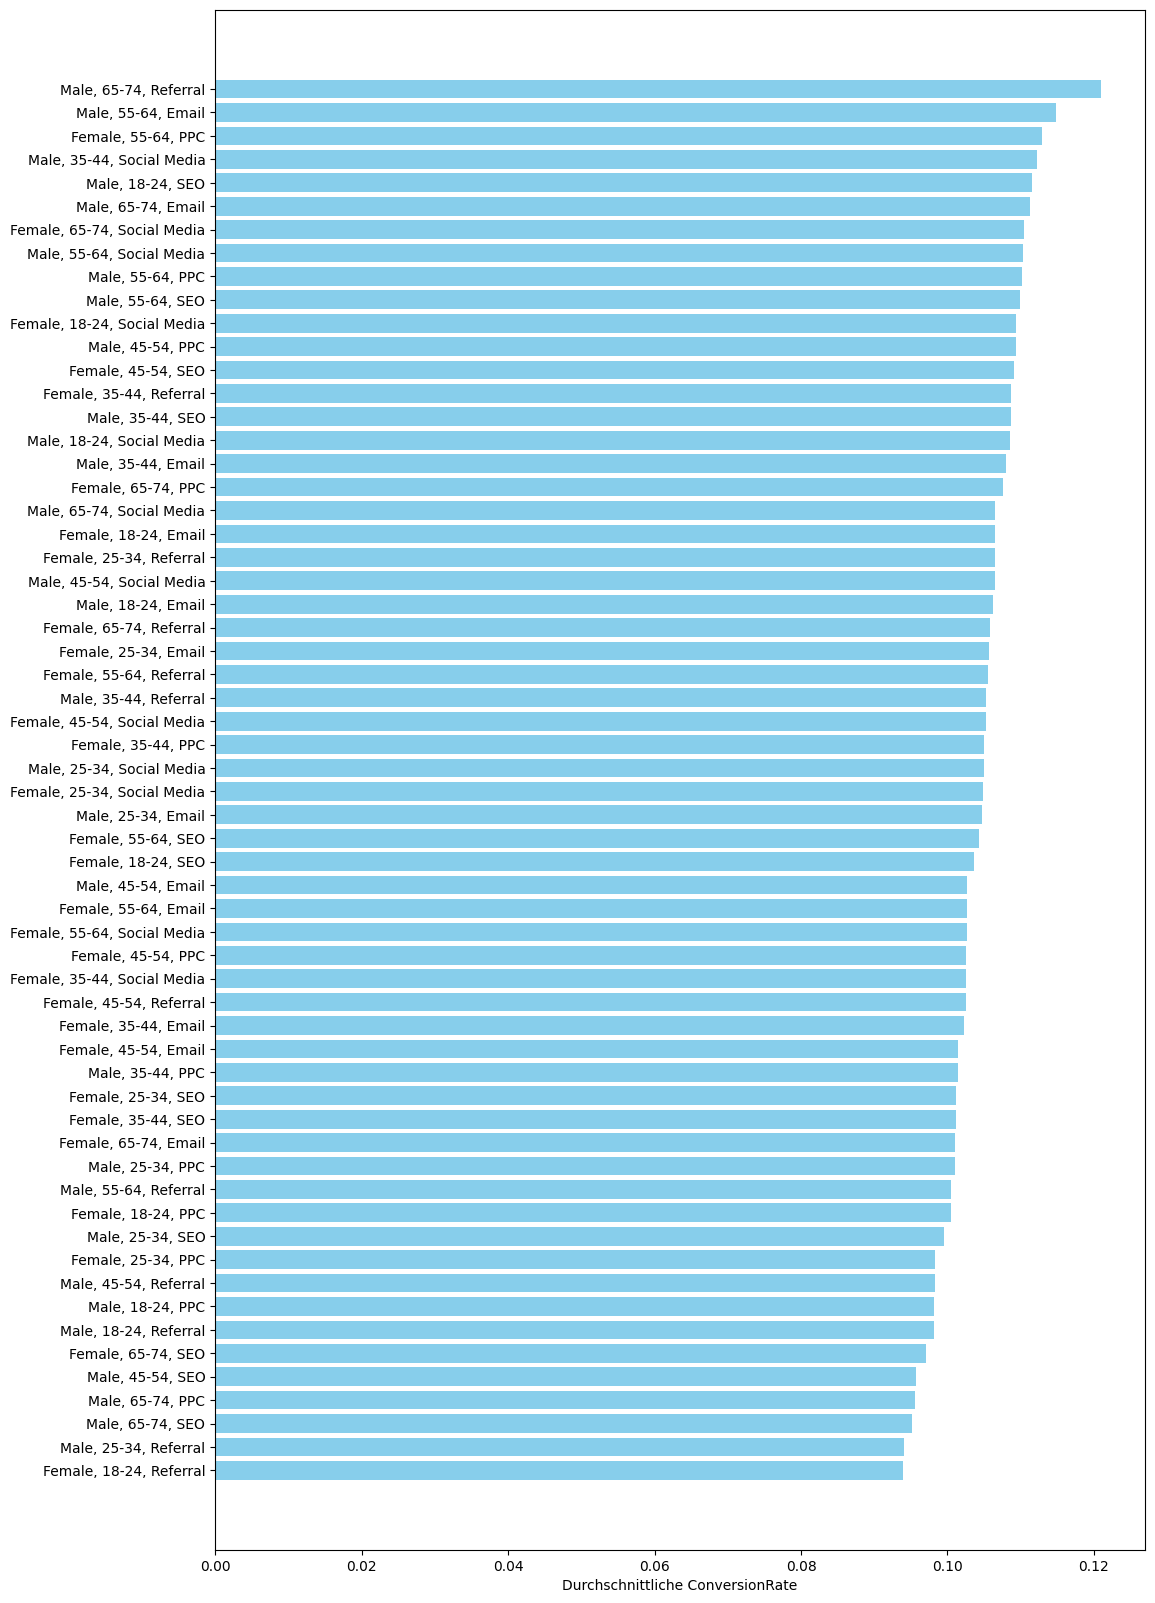

In [31]:
import matplotlib.pyplot as plt

# Zufällige Kombination auswählen
unique_combinations = grouped_df[['Gender', 'GroupedAge', 'CampaignChannel']].drop_duplicates()
statistics = []

for _, random_combination in unique_combinations.iterrows():
    # Kombination in den Testdaten sicherstellen
    test_data = grouped_df[(grouped_df['Gender'] == random_combination['Gender']) &
                           (grouped_df['GroupedAge'] == random_combination['GroupedAge']) &
                           (grouped_df['CampaignChannel'] == random_combination['CampaignChannel'])]

    test_statistic = test_data['ConversionRate'].mean()
    statistics.append((f"{random_combination['Gender']}, {random_combination['GroupedAge']}, {random_combination['CampaignChannel']}", test_statistic))

# Sortieren der Statistiken nach den Werten
statistics.sort(key=lambda x: x[1])

# Extrahieren der Labels und Werte
labels, values = zip(*statistics)

# Balkendiagramm erstellen
plt.figure(figsize=(12, 20))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Durchschnittliche ConversionRate')
#plt.title('Durchschnittliche ConversionRate für jede Kombination von Gender, GroupedAge und CampaignChannel')
plt.show()


Naives Modell: Ausgabe des Durchschnitts

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

test_predictions = []
test_statistics = []
mse_values = []
mae_values = []
rmse_values = []

# Zufällige Kombination auswählen
unique_combinations = grouped_df[['Gender', 'GroupedAge', 'CampaignChannel']].drop_duplicates()
for _, random_combination in unique_combinations.iterrows():
    # Kombination in den Testdaten sicherstellen
    test_data = grouped_df[(grouped_df['Gender'] == random_combination['Gender']) &
                           (grouped_df['GroupedAge'] == random_combination['GroupedAge']) &
                           (grouped_df['CampaignChannel'] == random_combination['CampaignChannel'])]

    # Restliche Daten als Trainingsdaten
    train_data = grouped_df.drop(test_data.index)

    # Durchschnittliche ConversionRate für die Trainingsdaten berechnen
    mean_conversion_rate = train_data['ConversionRate'].mean()

    # Vorhersagen für die Testdaten
    test_pred = np.full(len(test_data), mean_conversion_rate)

    # Tatsächliche Werte der Testdaten
    y_test = test_data['ConversionRate'].values

    # Modell evaluieren
    mae = mean_absolute_error(y_test, test_pred)
    mse = mean_squared_error(y_test, test_pred)
    rmse = np.sqrt(mse)

    #print(f'Mean Absolute Error: {mae}')
    #print(f'Mean Squared Error: {mse}')
    #print(f'Root Mean Squared Error: {rmse}')
    
    test_predictions.extend(test_pred)
    test_statistics.extend(y_test)
    mse_values.append(mse)
    mae_values.append(mae)
    rmse_values.append(rmse)

# Durchschnittliche Werte für mse, mae und rmse berechnen
average_mse = np.mean(mse_values)
average_mae = np.mean(mae_values)
average_rmse = np.mean(rmse_values)

print(f'Durchschnittlicher Mean Squared Error (MSE): {average_mse}')
print(f'Durchschnittlicher Mean Absolute Error (MAE): {average_mae}')
print(f'Durchschnittlicher Root Mean Squared Error (RMSE): {average_rmse}')

Durchschnittlicher Mean Squared Error (MSE): 0.0030193929640884966
Durchschnittlicher Mean Absolute Error (MAE): 0.04774485340040847
Durchschnittlicher Root Mean Squared Error (RMSE): 0.05490933062554634


Modellentwicklung: Neuronales Netz

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

test_predictions = []
test_statistics = []
mse_values = []
mae_values = []
rmse_values = []

# Zufällige Kombination auswählen
unique_combinations = grouped_df[['Gender', 'GroupedAge', 'CampaignChannel']].drop_duplicates()
for _, random_combination in unique_combinations.iterrows():
    # Kombination in den Testdaten sicherstellen
    test_data = grouped_df[(grouped_df['Gender'] == random_combination['Gender']) &
                           (grouped_df['GroupedAge'] == random_combination['GroupedAge']) &
                           (grouped_df['CampaignChannel'] == random_combination['CampaignChannel'])]

    # Restliche Daten als Trainingsdaten
    train_data = grouped_df.drop(test_data.index)

    # Test- und Trainingsdaten anzeigen
    #print("Trainingsdaten:")

    #print("\nTestdaten:")

    #print("\nAusgewählte Kombination:")
    #print(random_combination)

    # Beispieldaten
    test = { 
        'GroupedAge': [random_combination['GroupedAge']],
        'Gender': [random_combination['Gender']],
        'CampaignChannel': [random_combination['CampaignChannel']]
    }
    test_df = pd.DataFrame(test)

    # Daten vorbereiten
    X = train_data[['GroupedAge', 'Gender', 'CampaignChannel']]
    y = train_data['ConversionRate']

    # Kategorische Daten kodieren
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X[['GroupedAge', 'Gender', 'CampaignChannel']])
    test_encoded = encoder.transform(test_df[['GroupedAge', 'Gender', 'CampaignChannel']])

    X_encoded_dense = X_encoded.toarray()  # Convert sparse matrix to dense
    test_encoded_dense = test_encoded.toarray()

    #print(X_encoded_dense.shape)

    # Trainings- und Testdaten aufteilen
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Modell erstellen
    model = Sequential()
    model.add(Dense(10, input_dim=X_encoded.shape[1], activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Modell kompilieren
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Modell trainieren
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

    # Vorhersagen auf den Testdaten
    y_pred = model.predict(X_test)
    test_pred = model.predict(test_encoded)

    # Modell evaluieren
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)

    #print(f'Mean Absolute Error: {mae}')
    #print(f'Mean Squared Error: {mse}')
    #print(f'Root Mean Squared Error: {rmse}')

    #print(f'Vorhersage für Beispieldaten: {test_pred}')

    test_statistic = test_data['ConversionRate'].mean()
    #print(f'Statistischer Wert für Beispieldaten: {test_statistic}')
    test_predictions.append(test_pred.flatten()[0])
    test_statistics.append(test_statistic)
    mse_values.append(mse)
    mae_values.append(mae)
    rmse_values.append(rmse)  

# Durchschnittliche Werte für mse, mae und rmse berechnen
average_mse = np.mean(mse_values)
average_mae = np.mean(mae_values)
average_rmse = np.mean(rmse_values)

print(f'Durchschnittlicher Mean Squared Error (MSE): {average_mse}')
print(f'Durchschnittlicher Mean Absolute Error (MAE): {average_mae}')
print(f'Durchschnittlicher Root Mean Squared Error (RMSE): {average_rmse}')

# Mean Absolute Error zwischen allen test_pred und test_statistic berechnen
mean_error = np.mean(np.abs(np.array(test_predictions) - np.array(test_statistics)))
print(f'Mean Absolute Error zwischen test_pred und test_statistic: {mean_error}')

# Berechnung der Standardabweichung für jede Kombination
std_devs = grouped_df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].std().reset_index()

# Berechnung des Durchschnitts der Standardabweichungen
average_std_dev = std_devs['ConversionRate'].mean()

print(f'Durchschnittliche Standardabweichung von ConversionRate: {average_std_dev}')

# Berechnung des Anteils von MAE und RMSE in Prozent
mae_percentage = (average_mae / average_std_dev) * 100
rmse_percentage = (average_rmse / average_std_dev) * 100

print(f'MAE als Prozentsatz von average_std_dev: {mae_percentage:.2f}%')
print(f'RMSE als Prozentsatz von average_std_dev: {rmse_percentage:.2f}%')


c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0646 - val_loss: 0.0077
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0065 - val_loss: 0.0049
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0629 - val_loss: 0.0124
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0094 - val_loss: 0.0060
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/s

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1252 - val_loss: 0.0249
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0220 - val_loss: 0.0104
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0099 - val_loss: 0.0064
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0067 - val_loss: 0.0050
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.1119 - val_loss: 0.0156
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0143 - val_loss: 0.0077
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0075 - val_loss: 0.0054
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0053 - val_loss: 0.0041
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8m

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.1793 - val_loss: 0.0314
Epoch 2/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0212 - val_loss: 0.0090
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0073 - val_loss: 0.0056
Epoch 4/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 6/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 7/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 8/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 9/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 10/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 11/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 12/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3679 - val_loss: 0.0339
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0270 - val_loss: 0.0118
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0107 - val_loss: 0.0072
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0068 - val_loss: 0.0059
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0909 - val_loss: 0.0175
Epoch 2/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0156 - val_loss: 0.0080
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0076 - val_loss: 0.0056
Epoch 4/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 6/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 7/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 8/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 10/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 11/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 12/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0844 - val_loss: 0.0108
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0090 - val_loss: 0.0065
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0061 - val_loss: 0.0050
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0741 - val_loss: 0.0120
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0092 - val_loss: 0.0051
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.2941 - val_loss: 0.0337
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0240 - val_loss: 0.0105
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0096 - val_loss: 0.0070
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0065 - val_loss: 0.0057
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0054 - val_loss: 0.0048
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.1677 - val_loss: 0.0261
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0228 - val_loss: 0.0114
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0107 - val_loss: 0.0069
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0066 - val_loss: 0.0050
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.2564 - val_loss: 0.0223
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0181 - val_loss: 0.0113
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0100 - val_loss: 0.0082
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0073 - val_loss: 0.0060
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0591 - val_loss: 0.0099
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0085 - val_loss: 0.0054
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1188 - val_loss: 0.0202
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0164 - val_loss: 0.0096
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0083 - val_loss: 0.0066
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/s

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0864 - val_loss: 0.0119
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0096 - val_loss: 0.0055
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 9

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0889 - val_loss: 0.0148
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0117 - val_loss: 0.0066
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - val_loss: 0.0045
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.4299 - val_loss: 0.0523
Epoch 2/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0382 - val_loss: 0.0171
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0149 - val_loss: 0.0091
Epoch 4/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0083 - val_loss: 0.0063
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0061 - val_loss: 0.0052
Epoch 6/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 7/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 8/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 9/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 10/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 11/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 12/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.1182 - val_loss: 0.0242
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0169 - val_loss: 0.0087
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0069 - val_loss: 0.0053
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0947 - val_loss: 0.0148
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0109 - val_loss: 0.0069
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0066 - val_loss: 0.0052
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0050 - val_loss: 0.0042
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0492 - val_loss: 0.0136
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0106 - val_loss: 0.0054
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0048 - val_loss: 0.0038
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0393 - val_loss: 0.0075
Epoch 2/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0065 - val_loss: 0.0048
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 4/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 6/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 7/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 8/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 9/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 10/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 11/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 12/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0509 - val_loss: 0.0088
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0071 - val_loss: 0.0055
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.1101 - val_loss: 0.0212
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0153 - val_loss: 0.0078
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0066 - val_loss: 0.0053
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0796 - val_loss: 0.0109
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0084 - val_loss: 0.0049
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0045 - val_loss: 0.0037
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0643 - val_loss: 0.0095
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0071 - val_loss: 0.0050
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1544 - val_loss: 0.0239
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0171 - val_loss: 0.0071
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0971 - val_loss: 0.0162
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0115 - val_loss: 0.0074
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.2658 - val_loss: 0.0365
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0247 - val_loss: 0.0109
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0093 - val_loss: 0.0074
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0734 - val_loss: 0.0098
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0080 - val_loss: 0.0050
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0660 - val_loss: 0.0108
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0087 - val_loss: 0.0049
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0047 - val_loss: 0.0037
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1743 - val_loss: 0.0256
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0209 - val_loss: 0.0097
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0087 - val_loss: 0.0058
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0054 - val_loss: 0.0046
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0682 - val_loss: 0.0167
Epoch 2/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0124 - val_loss: 0.0058
Epoch 3/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 4/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 5/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 6/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 7/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 8/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 9/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 10/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 11/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 12/50
156/156 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.2510 - val_loss: 0.0315
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0222 - val_loss: 0.0095
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0081 - val_loss: 0.0058
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0054 - val_loss: 0.0047
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1757 - val_loss: 0.0306
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0230 - val_loss: 0.0108
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0089 - val_loss: 0.0064
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0689 - val_loss: 0.0082
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0069 - val_loss: 0.0043
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0613 - val_loss: 0.0127
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0111 - val_loss: 0.0066
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0052 - val_loss: 0.0042
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1021 - val_loss: 0.0194
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0147 - val_loss: 0.0071
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0064 - val_loss: 0.0047
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0266 - val_loss: 0.0067
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0062 - val_loss: 0.0046
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0044 - val_loss: 0.0037
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0673 - val_loss: 0.0093
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0083 - val_loss: 0.0048
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0046 - val_loss: 0.0037
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.2106 - val_loss: 0.0318
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0238 - val_loss: 0.0093
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0086 - val_loss: 0.0063
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0061 - val_loss: 0.0050
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0735 - val_loss: 0.0105
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0090 - val_loss: 0.0064
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.1631 - val_loss: 0.0220
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0171 - val_loss: 0.0096
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0085 - val_loss: 0.0068
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0064 - val_loss: 0.0054
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1082 - val_loss: 0.0198
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0153 - val_loss: 0.0079
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0070 - val_loss: 0.0052
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0612 - val_loss: 0.0093
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0089 - val_loss: 0.0051
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0232 - val_loss: 0.0068
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0059 - val_loss: 0.0045
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0814 - val_loss: 0.0121
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0100 - val_loss: 0.0061
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0806 - val_loss: 0.0199
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0156 - val_loss: 0.0076
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0067 - val_loss: 0.0049
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.1468 - val_loss: 0.0277
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0210 - val_loss: 0.0112
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0097 - val_loss: 0.0070
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0061 - val_loss: 0.0052
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0393 - val_loss: 0.0090
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0079 - val_loss: 0.0047
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1544 - val_loss: 0.0255
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0176 - val_loss: 0.0106
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0089 - val_loss: 0.0071
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0776 - val_loss: 0.0187
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0137 - val_loss: 0.0085
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0073 - val_loss: 0.0056
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0205 - val_loss: 0.0055
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1466 - val_loss: 0.0269
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0195 - val_loss: 0.0102
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0085 - val_loss: 0.0059
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0057 - val_loss: 0.0047
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.2204 - val_loss: 0.0394
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0261 - val_loss: 0.0108
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0088 - val_loss: 0.0071
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0061 - val_loss: 0.0055
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.1809 - val_loss: 0.0234
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0179 - val_loss: 0.0102
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0088 - val_loss: 0.0063
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1193 - val_loss: 0.0191
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0137 - val_loss: 0.0065
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0063 - val_loss: 0.0046
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.1521 - val_loss: 0.0256
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0205 - val_loss: 0.0083
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0077 - val_loss: 0.0054
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0053 - val_loss: 0.0044
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1627 - val_loss: 0.0233
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0201 - val_loss: 0.0112
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0100 - val_loss: 0.0075
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0069 - val_loss: 0.0056
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1196 - val_loss: 0.0230
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0168 - val_loss: 0.0074
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0062 - val_loss: 0.0050
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2

c:\Users\gabri\Desktop\Uni\Bachelorarbeit\Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1228 - val_loss: 0.0248
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0178 - val_loss: 0.0094
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0083 - val_loss: 0.0064
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2

C:\Users\gabri\AppData\Local\Temp\ipykernel_29672\3426761972.py:111: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_devs = grouped_df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].std().reset_index()


Modellentwicklung: XGBoost

In [34]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

test_predictions = []
test_statistics = []
mse_values = []
mae_values = []
rmse_values = []

# Zufällige Kombination auswählen
unique_combinations = grouped_df[['Gender', 'GroupedAge', 'CampaignChannel']].drop_duplicates()
for _, random_combination in unique_combinations.iterrows():
    # Kombination in den Testdaten sicherstellen
    test_data = grouped_df[(grouped_df['Gender'] == random_combination['Gender']) &
                           (grouped_df['GroupedAge'] == random_combination['GroupedAge']) &
                           (grouped_df['CampaignChannel'] == random_combination['CampaignChannel'])]

    # Restliche Daten als Trainingsdaten
    train_data = grouped_df.drop(test_data.index)

    # Test- und Trainingsdaten anzeigen
    #print("Trainingsdaten:")

    #print("\nTestdaten:")

    #print("\nAusgewählte Kombination:")
    #print(random_combination)

    # Beispieldaten
    test = { 
        'GroupedAge': [random_combination['GroupedAge']],
        'Gender': [random_combination['Gender']],
        'CampaignChannel': [random_combination['CampaignChannel']]
    }
    test_df = pd.DataFrame(test)

    # Daten vorbereiten
    X = grouped_df[['GroupedAge', 'Gender', 'CampaignChannel']]
    y = grouped_df['ConversionRate']

    # Kategorische Daten kodieren
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X)
    test_encoded = encoder.transform(test_df)

    # Trainings- und Testdaten aufteilen
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # XGBoost Modell erstellen
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train, y_train)

    # Vorhersagen auf den Testdaten
    y_pred = xgb_model.predict(X_test)
    test_pred = xgb_model.predict(test_encoded)

    # Modell evaluieren
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    #print(f'Mean Absolute Error: {mae}')
    #print(f'Mean Squared Error: {mse}')
    #print(f'Root Mean Squared Error: {rmse}')
    
    #print(f'Vorhersage für Beispieldaten: {test_pred[0]}')
    
    test_statistic = test_data['ConversionRate'].mean()
    #print(f'Statistischer Wert für Beispieldaten: {test_statistic}')
    test_predictions.append(test_pred.flatten()[0])
    test_statistics.append(test_statistic)
    mse_values.append(mse)
    mae_values.append(mae)
    rmse_values.append(rmse)

# Durchschnittliche Werte für mse, mae und rmse berechnen
average_mse = np.mean(mse_values)
average_mae = np.mean(mae_values)
average_rmse = np.mean(rmse_values)

print(f'Durchschnittlicher Mean Squared Error (MSE): {average_mse}')
print(f'Durchschnittlicher Mean Absolute Error (MAE): {average_mae}')
print(f'Durchschnittlicher Root Mean Squared Error (RMSE): {average_rmse}')

# Mean Absolute Error zwischen allen test_pred und test_statistic berechnen
mean_error = np.mean(np.abs(np.array(test_predictions) - np.array(test_statistics)))
print(f'Mean Absolute Error zwischen test_pred und test_statistic: {mean_error}')

# Berechnung der Standardabweichung für jede Kombination
std_devs = grouped_df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].std().reset_index()

# Berechnung des Durchschnitts der Standardabweichungen
average_std_dev = std_devs['ConversionRate'].mean()

print(f'Durchschnittliche Standardabweichung von ConversionRate: {average_std_dev}')

# Berechnung des Anteils von MAE und RMSE in Prozent
mae_percentage = (average_mae / average_std_dev) * 100
rmse_percentage = (average_rmse / average_std_dev) * 100

print(f'MAE als Prozentsatz von average_std_dev: {mae_percentage:.2f}%')
print(f'RMSE als Prozentsatz von average_std_dev: {rmse_percentage:.2f}%')

Durchschnittlicher Mean Squared Error (MSE): 0.002962998881797027
Durchschnittlicher Mean Absolute Error (MAE): 0.04711255404418708
Durchschnittlicher Root Mean Squared Error (RMSE): 0.05443343532974036
Mean Absolute Error zwischen test_pred und test_statistic: 0.002012986719662375
Durchschnittliche Standardabweichung von ConversionRate: 0.05487143410280489
MAE als Prozentsatz von average_std_dev: 85.86%
RMSE als Prozentsatz von average_std_dev: 99.20%


C:\Users\gabri\AppData\Local\Temp\ipykernel_29672\3854835213.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_devs = grouped_df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].std().reset_index()


Durchschnittliche Standardabweicung der 'ConversionRate' für jede Kombination von 'Gender', 'GroupedAge' und 'CampaignChannel'

In [35]:
# Berechnung der Standardabweichung für jede Kombination
std_devs = grouped_df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].std().reset_index()

# Berechnung des Durchschnitts der Standardabweichungen
average_std_dev = std_devs['ConversionRate'].mean()

print(f'Durchschnittliche Standardabweichung von ConversionRate: {average_std_dev}')

Durchschnittliche Standardabweichung von ConversionRate: 0.05487143410280489


C:\Users\gabri\AppData\Local\Temp\ipykernel_29672\1535997134.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_devs = grouped_df.groupby(['Gender', 'GroupedAge', 'CampaignChannel'])['ConversionRate'].std().reset_index()


In [36]:
print("ENDE")

ENDE
